In [58]:
from gibbs.dataclass import GibbsResult
import matplotlib.pyplot as plt
import numpy as np
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
from gibbs.utils import number_of_elements
from gibbs.preparation.varqite import efficientTwoLocalansatz
from gibbs.learning.hamiltonian_learning import HamiltonianLearning
from scipy.sparse import bmat
from scipy.sparse.linalg import svds, eigsh
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
result_nocfield = GibbsResult.load(
    "saved_simulations/turbo/heisenberg_MAP/cfield=[]_date=21.01.2023_13:42:52.npy"
    )
# result_cfield = GibbsResult.load(
#     "saved_simulations/turbo/heisenberg_MAP/cfield=['0.25', 'ZIIIIIII', '0.25', 'IZIIIIII', '0.25', 'IIZIIIII', '0.25', 'IIIZIIII', '0.25', 'IIIIZIII', '0.25', 'IIIIIZII', '0.25', 'IIIIIIZI', '0.25', 'IIIIIIIZ']_date=22.01.2023_15:10:44.npy"
#     )

result_cfield = GibbsResult.load(
    "saved_simulations/turbo/heisenberg_MAP/cfield=['-0.25', 'IIIZIIII']_date=22.01.2023_15:26:13.npy"
)

In [60]:
state_nocfield,_ = efficientTwoLocalansatz(**result_nocfield.ansatz_arguments)
hl_nocfield = HamiltonianLearning(state=state_nocfield,
                                  k_constraints=3,
                                  k_learning=3,
                                  parameters=result_nocfield.parameters,
)
hl_nocfield.sample_paulis(shots = 1000000)
hl_nocfield.create_constraint_matrix()

state_cfield,_ = efficientTwoLocalansatz(**result_cfield.ansatz_arguments)
hl_cfield = HamiltonianLearning(state=state_cfield,
                                  k_constraints=3,
                                  k_learning=3,
                                  parameters=result_cfield.parameters,
)
hl_cfield.sample_paulis(shots = 1000000)
hl_cfield.create_constraint_matrix()

A = bmat([[hl_nocfield.constraint_matrix,None                       ],
          [hl_cfield.constraint_matrix,hl_cfield.constraint_matrix  ]])

In [61]:
from numpy.linalg import eigh
ATA = A.T.conj() @ A
evals, evecs = eigh(ATA.todense(), UPLO="L")
print(evals)

[-2.48385075e-16 -2.05188781e-16 -1.92991935e-16 -1.86930252e-16
 -1.86849623e-16 -1.80522226e-16 -1.62689695e-16 -1.56251025e-16
 -1.54700640e-16 -1.40943008e-16 -1.35903333e-16 -1.35123684e-16
 -1.31202326e-16 -1.31071262e-16 -1.20502196e-16 -1.16830615e-16
 -1.10937536e-16 -1.09114446e-16 -1.03907107e-16 -1.03659679e-16
 -9.47573959e-17 -9.33262931e-17 -8.83149693e-17 -8.66260123e-17
 -8.31376764e-17 -8.23638831e-17 -7.72174358e-17 -7.61613008e-17
 -7.28106233e-17 -6.97076020e-17 -6.42174839e-17 -6.29190674e-17
 -6.11322049e-17 -5.48882574e-17 -5.38123621e-17 -5.11335918e-17
 -4.66329354e-17 -4.29193066e-17 -4.04451841e-17 -3.98225396e-17
 -3.91586108e-17 -3.82875598e-17 -3.62256483e-17 -3.44401094e-17
 -3.21562369e-17 -3.07803401e-17 -2.82511482e-17 -2.79103859e-17
 -2.69461037e-17 -2.67283033e-17 -2.50755538e-17 -2.50342435e-17
 -2.49733574e-17 -2.36449529e-17 -2.36428587e-17 -2.26535879e-17
 -2.18119949e-17 -2.01957998e-17 -1.85632564e-17 -1.80556569e-17
 -1.72836078e-17 -1.69897

[ 0.00000000e+00+0.j  1.34253770e-11+0.j -1.67955003e-11+0.j
  1.26388833e-11+0.j -5.02292953e-11+0.j  1.97384702e-10+0.j
 -2.33769967e-12+0.j -4.91031289e-11+0.j -1.59552493e-12+0.j
  1.99697339e-11+0.j  2.49096301e-11+0.j -1.10354685e-11+0.j
  4.17561545e-11+0.j  2.85923001e-12+0.j  2.73024201e-11+0.j
  9.29662677e-12+0.j -2.37971971e-09+0.j -5.76815090e-09+0.j
 -4.30593202e-09+0.j -4.87742619e-09+0.j -2.52425830e-09+0.j
 -7.87135894e-09+0.j -4.05082608e-09+0.j -7.23221066e-09+0.j
  7.23094013e-10+0.j  1.02488506e-09+0.j  1.31922460e-09+0.j
  1.26366023e-09+0.j  1.43948926e-09+0.j  6.88430236e-10+0.j
 -5.38046115e-10+0.j -8.39613175e-12+0.j -3.29587143e-11+0.j
 -2.61480964e-11+0.j -1.80206688e-11+0.j -3.15690201e-11+0.j
 -4.19882287e-11+0.j -5.06790159e-11+0.j  5.19620434e-12+0.j
 -3.24517154e-11+0.j  1.34824211e-14+0.j  2.15380071e-12+0.j
  4.71688524e-11+0.j -1.28662181e-10+0.j -1.27562115e-11+0.j
  2.08083457e-11+0.j -2.66253578e-13+0.j  2.16639171e-11+0.j
  5.35875194e-11+0.j  2.

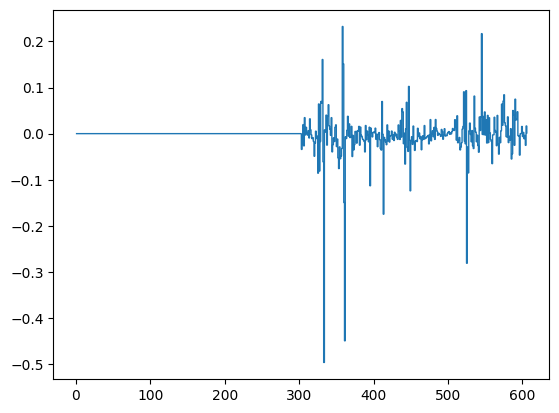

In [62]:
filtered_vec = np.asarray(evecs[:,1].copy()).flatten()
print(filtered_vec.T)
plt.stairs(filtered_vec)